In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# Define the autoencoder model
input_img = keras.Input(shape=(28, 28, 1))

In [6]:
# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
encoded = layers.Flatten()(x)

In [7]:
# Decoder
x = layers.Dense(7 * 7 * 64, activation='relu')(encoded)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = keras.Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))

2024-09-23 01:05:24.749758: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2024-09-23 01:05:25.323177: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 592s 315ms/step - loss: 0.0264 - val_loss: 0.0036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 383s 204ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 361s 192ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 362s 193ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 358s 191ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 357s 190ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 360s 192ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 371s 198ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 368s 196ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 381s 196ms/step - loss: 0.0014 - val_loss: 0.0014


In [10]:
# Colorization logic (example)
def colorize_digit(image, label):
    if label % 2 == 0:  # Even
        color = [0, 1, 0]  # Green
    else:  # Odd
        color = [1, 0, 0]  # Red
    colored_image = image * color
    return colored_image

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


2024-09-23 06:40:39.176932: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 94080000 exceeds 10% of free system memory.


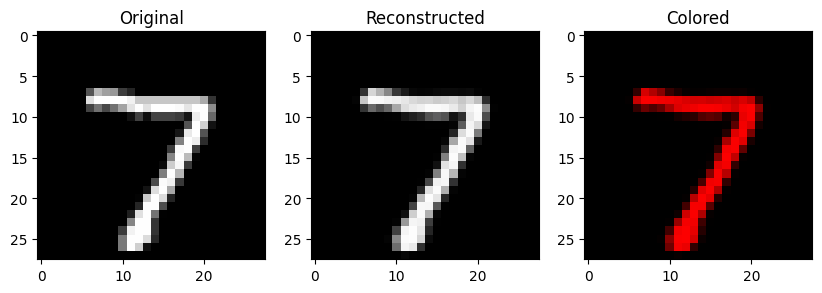

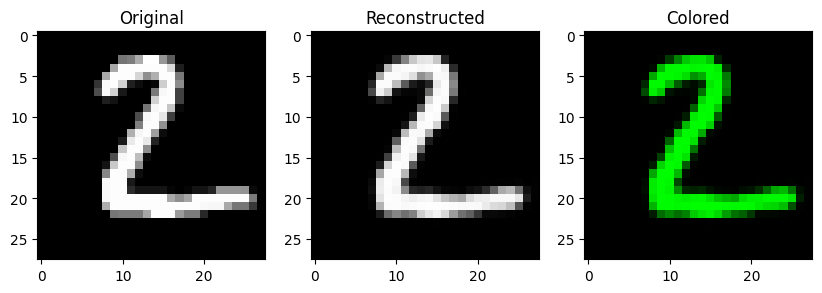

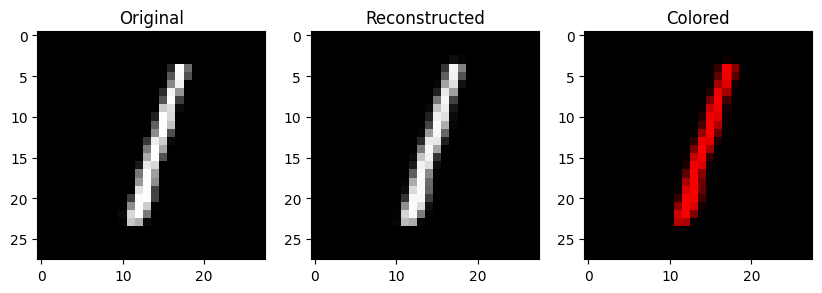

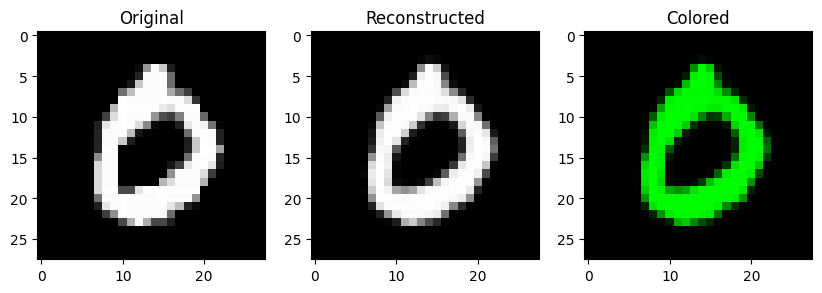

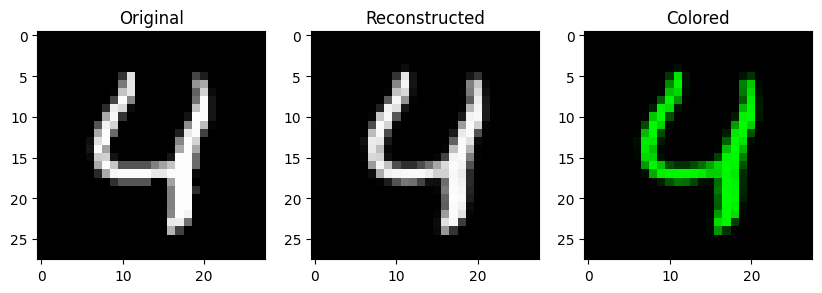

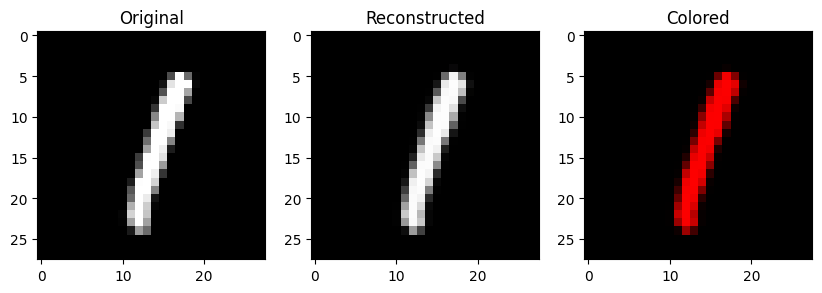

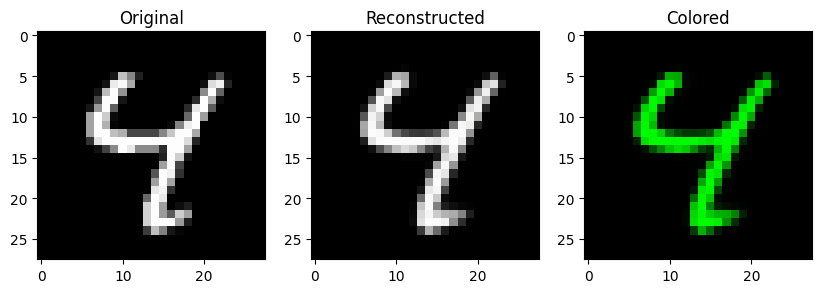

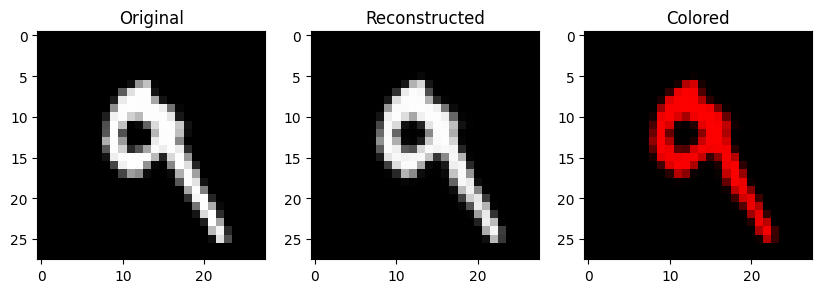

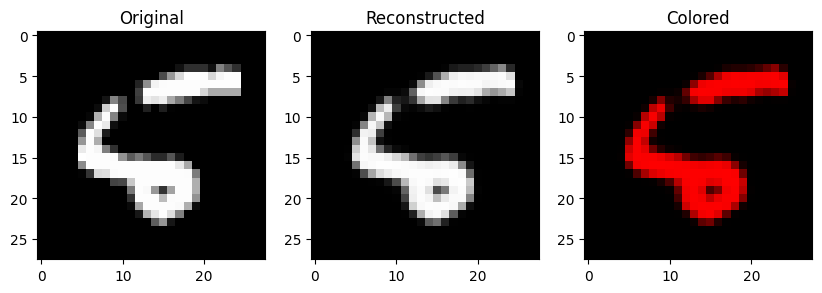

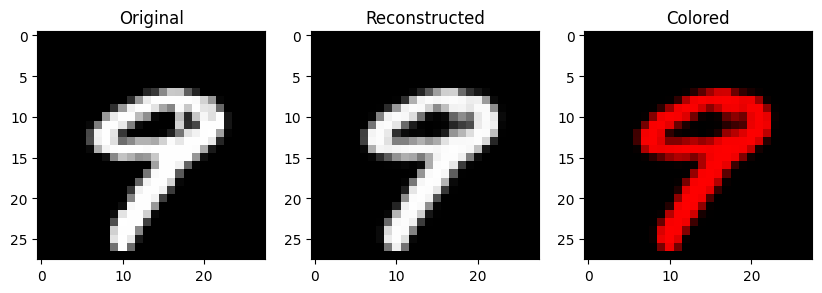

In [12]:
import matplotlib.pyplot as plt
# Test and visualize
reconstructed_images = autoencoder.predict(x_test)
for i in range(10):
    original_image = x_test[i].reshape(28, 28)
    reconstructed_image = reconstructed_images[i]
    colored_image = colorize_digit(reconstructed_image, y_test[i])
    # Display original, reconstructed, and colored images
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original')
    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_image)
    plt.title('Reconstructed')
    plt.subplot(1, 3, 3)
    plt.imshow(colored_image)
    plt.title('Colored')
    plt.show()


In [14]:
def display(array1, array2):
    """Displays ten random images from each array."""
    n = 10
    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

10000 10000 10000


In [16]:
score = autoencoder.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

2024-09-23 07:00:20.066610: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Incompatible shapes: [32] vs. [32,28,28,3]
	 [[{{node compile_loss/mse/sub}}]]


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/mse/sub defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/stnz/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/stnz/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/stnz/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/stnz/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_60499/2059697180.py", line 1, in <module>

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 433, in evaluate

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 165, in one_step_on_iterator

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 154, in one_step_on_data

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 85, in test_step

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/losses/losses.py", line 27, in call

  File "/home/stnz/.local/lib/python3.10/site-packages/keras/src/losses/losses.py", line 1303, in mean_squared_error

Incompatible shapes: [32] vs. [32,28,28,3]
	 [[{{node compile_loss/mse/sub}}]] [Op:__inference_one_step_on_iterator_141873]